In [6]:
from numpy import *

In [7]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [12]:
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T * xMat
    if linalg.det(xTx) == 0:
        print("This matrix is singular, no inversion")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [13]:
xArr, yArr = loadDataSet('ex0.txt')

In [14]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [17]:
ws = standRegres(xArr, yArr)

In [19]:
xMat = mat(xArr)
yMat = mat(yArr)

In [20]:
yHat = xMat * ws

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

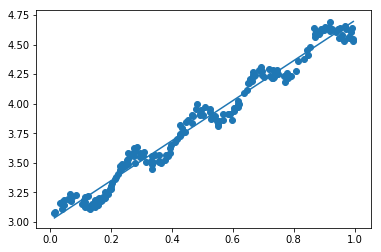

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat)
plt.show()

In [47]:
corrcoef(yHat.T, yMat)

array([[1.        , 0.13653777],
       [0.13653777, 1.        ]])

## Locally weighted linear regression

In [48]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    
    if linalg.det(xTx) == 0.0:
        print("Singular matrix")
        return
    
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [49]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [50]:
xArr, yArr = loadDataSet('ex0.txt')

In [51]:
yArr[0]

3.176513

In [52]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[3.12204471]])

In [53]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[3.20175729]])

In [54]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [55]:
xMat = mat(xArr)

In [56]:
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

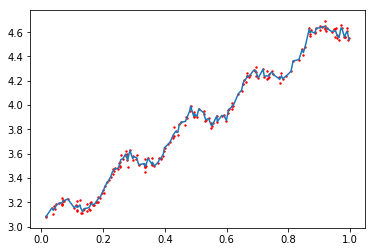

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xMat[:, 1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

## Abalone age prediction

In [60]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [61]:
abX, abY = loadDataSet('abalone.txt')

In [62]:
yHat01 = lwlrTest(abX[:99], abX[:99], abY[:99], 0.1)

In [64]:
yHat1 = lwlrTest(abX[:99], abX[:99], abY[:99], 1)

In [65]:
yHat10 = lwlrTest(abX[:99], abX[:99], abY[:99], 10)

In [66]:
rssError(abY[:99], yHat01.T)

56.78566368649334

In [67]:
rssError(abY[:99], yHat1.T)

429.89056187011795

In [68]:
rssError(abY[:99], yHat10.T)

549.1181708826483